## Problem Framing

What churn means in this dataset is customers who cancel or discontinue their internet subscription. Churn is very dangerous for this business because it will lead to loss of revenue.

Measuring  churns help business to gain insigts on how to improve their services. Reducung Churn can save cost by lowering acquisition cost for new custmers

This goal of this analysis is analyze patterns in customer behaviours that cause churn and give reccommendations that the business can implement to improve retention and reduce churn.

## Dataset Overview


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



### Loading the Dataset

In [2]:

df = pd.read_csv("../data/raw/churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)


Each row in the dataset represents an individual customer and their subscription details with the telecom company. The dataset includes customer demographic information, service usage patterns, subscription characteristics, and billing details.

Key features include customer tenure, type of internet service, contract type, payment method, monthly charges, and total charges. These variables provide insights into customer behaviour and engagement with the service.

The target variable for this analysis is `Churn`, which indicates whether a customer has discontinued their service.

The dataset contains approximately 7,043 customer records, making it suitable for both exploratory analysis and churn prediction modelling.


## Initial Data Inspection

In [4]:
#To check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Validating the target variable

In [5]:
#Check the proportion of the target variable
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


The `TotalCharges` column is currently an object type and will be converted to numeric for analysis. 

The target variable, Churn, is categorical and imbalanced, with fewer customers churning than staying. 


#### Fixing the column `TotalCharges` data type

In [6]:
# To convert the type from object type to numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Handling Missing Values

In [8]:
#To check the rows of the missing totalcharges to understand the reason for missing values
nan_rows_totalchargges = df[df['TotalCharges'].isnull()]
print(nan_rows_totalchargges)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

The `TotalCharges` column has 11 missing values. Investigating these rows shows that the missing rows correspond to customers with `zero tenure`, meaning they have just joined and have not yet been billed. 

Since their total charges should naturally be zero, we will fill the missing `TotalCharges` values with 0. This preserves all rows while keeping the data accurate.


In [9]:
#Filling the missing data values with zero 
df['TotalCharges'] = df['TotalCharges'].fillna(0)

## Feature Categorization

### Numeric Features
These features are numerical and can be used directly for statistical analysis and modeling.

- tenure: number of months the customer has stayed with the company
- MonthlyCharges: monthly billing amount
- TotalCharges: total amount charged to the customer over time

### Categorical Features
These features represent categories or labels and will require encoding before modeling.

- gender
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- SeniorCitizen: binary indicator (0 or 1)


### Target Variable
- Churn: indicates whether a customer has discontinued the service (Yes/No)


## Exploratory Data Analysis

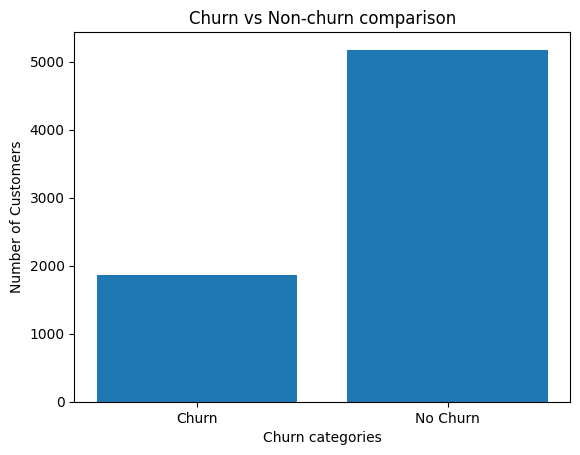

In [10]:
#Churn vs Non-Churn comparison
counts = df['Churn'].value_counts()

labels = ['Churn', 'No Churn']
values = [counts['Yes'], counts['No']]

plt.bar(labels, values)
plt.xlabel("Churn categories")
plt.ylabel("Number of Customers")
plt.title("Churn vs Non-churn comparison")
plt.show()

The graph is imbalanced. More customers did not churn

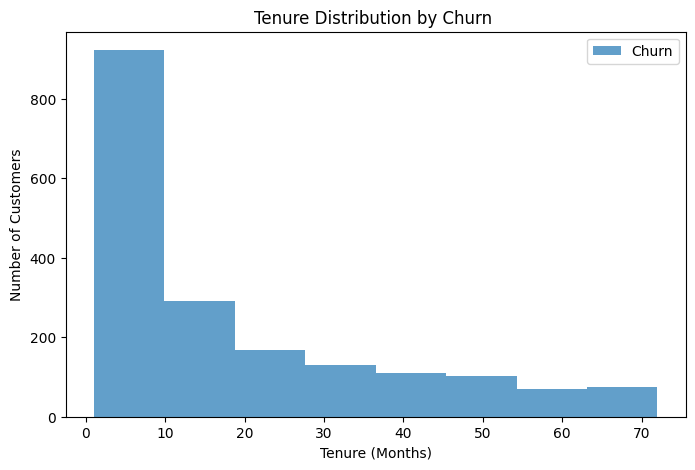

In [11]:
tenure_churn = df[df['Churn'] == 'Yes']['tenure']

plt.figure(figsize=(8, 5))
plt.hist(tenure_churn, bins=8, alpha=0.7, label='Churn')
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.title("Tenure Distribution by Churn ")
plt.legend()
plt.show()


Customers with shorter tenure have higher churn rates, while customers with longer tenure are more likely to be retained. This indicates that churn is most prevalent among newer customers, suggesting that early-stage customer engagement and onboarding play a critical role in retention.


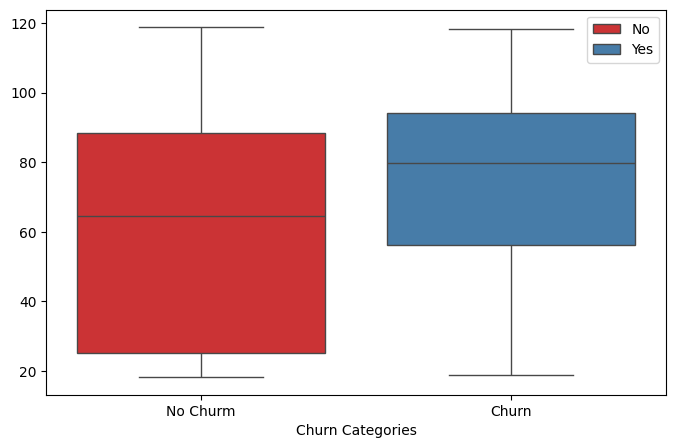

In [12]:
MonthlyCharges = df['MonthlyCharges']
Churn = df['Churn'].map({'Yes': 'Churn', 'No': 'No Churm'})
plt.figure(figsize=(8, 5))
sns.boxplot(x=Churn, y=MonthlyCharges, hue='Churn', palette='Set1', data=df)
plt.xlabel("Churn Categories")
plt.ylabel("")
plt.title("")
plt.legend()
plt.show()


Customers who churn tend to have higher monthly charges compared to those who are retained, as indicated by the higher median and upper quartiles in the boxplot. This suggests that higher-paying customers may be more sensitive to pricing or service value, highlighting the potential benefit of targeted retention strategies for these customers.


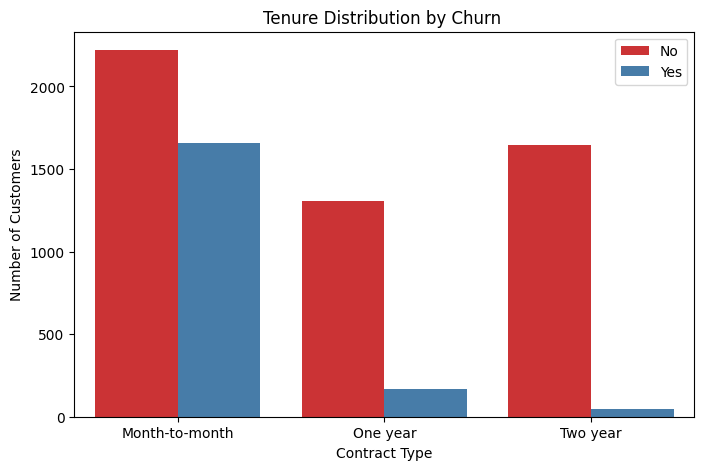

In [13]:
#How Contract type influence  churn
Contract_type = df['Contract']
plt.figure(figsize=(8, 5))
sns.countplot(x =Contract_type, hue='Churn', palette='Set1', data=df)
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.title("Tenure Distribution by Churn ")
plt.legend()
plt.show()


In [14]:
contract_churn_rate = (
    pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
)
contract_churn_rate

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


Month-to-month customers have the highest churn rate by a wide margin, while two-year contract customers are the most stable. Contract length is therefore a critical driver of customer retention.


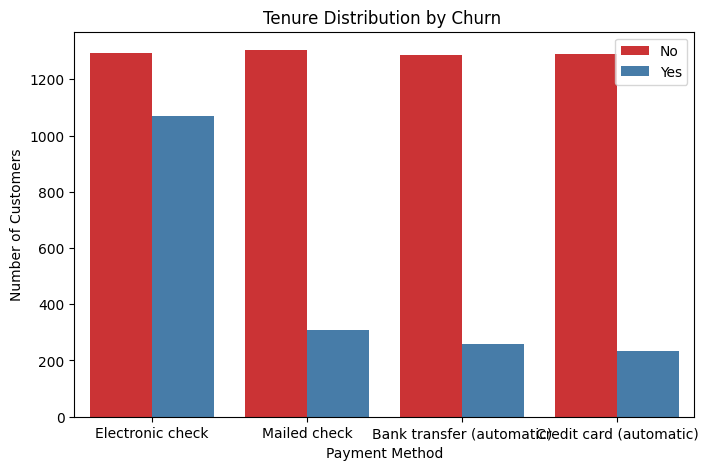

In [15]:
#How Payment method influence on  churn
Payment_method = df['PaymentMethod']
plt.figure(figsize=(8, 5))
sns.countplot(x =Payment_method, hue='Churn', palette='Set1', data=df)
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.title("Tenure Distribution by Churn ")
plt.legend()
plt.show()


In [16]:
Payment_method = (
    pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
)
Payment_method

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


Customers using electronic checks churn at almost 3× the rate of customers on automatic payments.

## Feature Engineering

In [17]:
# Removing Irrelevant Columns
df_model = df.drop(columns=['customerID'])


The `customerID` column is unique for each customer and will not be used as a feature in modeling.


In [18]:
#Encode varibales
# 2 patner, gender, dependents, phone service, PaperlessBilling
#mulltiple lines, internet service, OnlineSecurity, OnlineBackup, DeviceProtection, tech support, StreamingTV, S
# treamingMovies, Contract, 
#4 Payment method


In [19]:
#Encode target variable
df_model['Churn']= df_model['Churn'].map({'No': 0,'Yes': 1})

In [20]:
#Encode categorical variables
binary_columns =  ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for cols in binary_columns:
    df_model[cols]= df_model[cols].map({'No': 0,'Yes': 1})

In [21]:
#Encode categorical varbles with multiple category
multiple_columns =  ['MultipleLines', 'gender','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'Contract', 'PaymentMethod', 'StreamingMovies']
df_model = pd.get_dummies(df_model, columns = multiple_columns, dtype=int, drop_first=True)


In [22]:
df_model

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,2,1,1,53.85,108.15,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,0,...,1,0,1,1,0,0,0,1,0,1
7039,0,1,1,72,1,1,103.20,7362.90,0,0,...,0,0,1,1,0,1,0,0,0,1
7040,0,1,1,11,0,1,29.60,346.45,0,1,...,0,0,0,0,0,0,1,0,0,0
7041,1,1,0,4,1,1,74.40,306.60,1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
#Scale numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])

In [28]:
df_model

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,-1.277445,0,1,-1.160323,-0.992611,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0.066327,1,0,-0.259629,-0.172165,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0.514251,0,0,-0.746535,-0.193672,0,1,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,-1.236724,1,1,0.197365,-0.938874,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,-0.340876,1,1,0.665992,-0.127605,0,0,...,1,0,1,1,0,0,0,1,0,1
7039,0,1,1,1.613701,1,1,1.277533,2.242606,0,0,...,0,0,1,1,0,1,0,0,0,1
7040,0,1,1,-0.870241,0,1,-1.168632,-0.852932,0,1,...,0,0,0,0,0,0,1,0,0,0
7041,1,1,0,-1.155283,1,1,0.320338,-0.870513,1,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
service_columns = [
 'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes'
]
df_model['num_services'] = df_model[service_columns].sum(axis=1)



## Modelling

In [30]:
X = df_model.drop(columns=['Churn'])
y = df_model['Churn']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

[[927 108]
 [164 210]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC AUC: 0.8422175721408458


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

[[927 108]
 [164 210]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC AUC: 0.8422175721408458
